In [53]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv') # 훈련 데이터
test = pd.read_csv('test.csv') # 테스트 데이터
submission = pd.read_csv('sampleSubmission.csv') # 제출 양식

In [54]:
train.shape, test.shape, submission.shape

((10886, 12), (6493, 9), (6493, 2))

In [55]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


훈련 데이터를 활용해 모델을 훈련한 뒤, 테스트 데이터를 활용해 대여 수량(count)을 예측하고 이를 제출 양식에 맞춰 제출하면 됩니다.

In [56]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


훈련데이터에서는 casual 와 registered가 빠져있다.

In [57]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


결측값이 없고 데이터 타입도 동일합니다.

In [58]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


연도, 월, 일, 시간, 분, 초 피처 추가하기

In [60]:
print(train['datetime'][100]) # 100번째 행의 datetime 열 출력
print(train['datetime'][100].split()) # 100번째 행의 datetime 열을 공백을 기준으로 나누어 출력
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[1]) # 시간

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [61]:
print(train['datetime'][100].split()[0].split('-')) # 날짜를 -로 나누어 출력
print(train['datetime'][100].split()[0].split('-')[0]) # 날짜를 -로 나누어 출력
print(train['datetime'][100].split()[0].split('-')[1]) # 날짜를 -로 나누어 출력
print(train['datetime'][100].split()[0].split('-')[2]) # 날짜를 -로 나누어 출력


['2011', '01', '05']
2011
01
05


In [62]:
print(train['datetime'][100].split()[1].split(':')) # 시간을 :로 나누어 출력
print(train['datetime'][100].split()[1].split(':')[0]) # 시간을 :로 나누어 출력
print(train['datetime'][100].split()[1].split(':')[1]) # 시간을 :로 나누어 출력
print(train['datetime'][100].split()[1].split(':')[2]) # 시간을 :로 나누어 출력

['09', '00', '00']
09
00
00


파생변수 생성

In [63]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0]) # date 열 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0]) # year 열 생성
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1]) # month 열 생성
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2]) # day 열 생성
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0]) # hour 열 생성
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1]) # minute 열 생성
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2]) # second 열 생성



In [64]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00


In [65]:
from datetime import datetime
import calendar

print(train['date'][100]) # 100번째 행의 date 열 출력
print(pd.to_datetime(train['date'][100])) # 100번째 행의 date 열을 datetime 형식으로 출력
print(pd.to_datetime(train['date'][100]).weekday()) # 100번째 행의 date 열의 요일 출력
print(calendar.day_name[pd.to_datetime(train['date'][100]).weekday()]) # 100번째 행의 date 열의 요일 출력

2011-01-05
2011-01-05 00:00:00
2
Wednesday


요일 피처 추가

In [66]:
train['weekday'] = train['date'].apply(lambda x: calendar.day_name[pd.to_datetime(x).weekday()]) # weekday 열 생성

In [ ]:
# # 변환 후 NaN 값이 발생하면 기본값을 지정
# train['season'] = train['season'].map({
#     1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
# }).fillna('Unknown')

# train['weather'] = train['weather'].map({
#     1: 'Clear', 2: 'Mist, Few clouds', 3: 'Light Snow, Rain, Thunderstorm', 4: 'Heavy Rain, Thunderstorm, Snow, Fog'
# }).fillna('Unknown')

# # 필요하면 범주형 데이터로 변환
# train['season'] = train['season'].astype('category')
# train['weather'] = train['weather'].astype('category')

In [67]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00,Wednesday


데이터 시각화

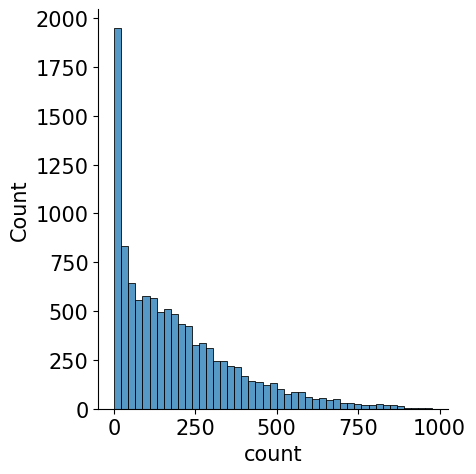

In [73]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


mpl.rc('font',size=15)
sns.displot(train['count'])

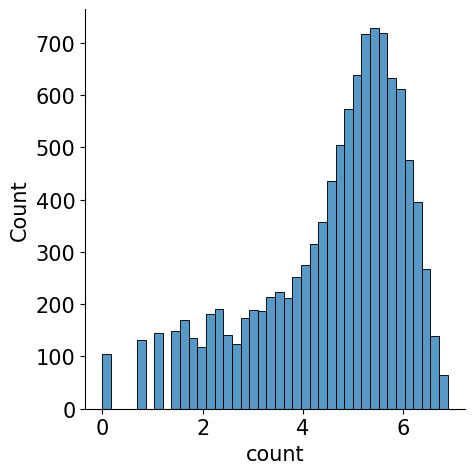

In [74]:
sns.displot(np.log(train['count']))

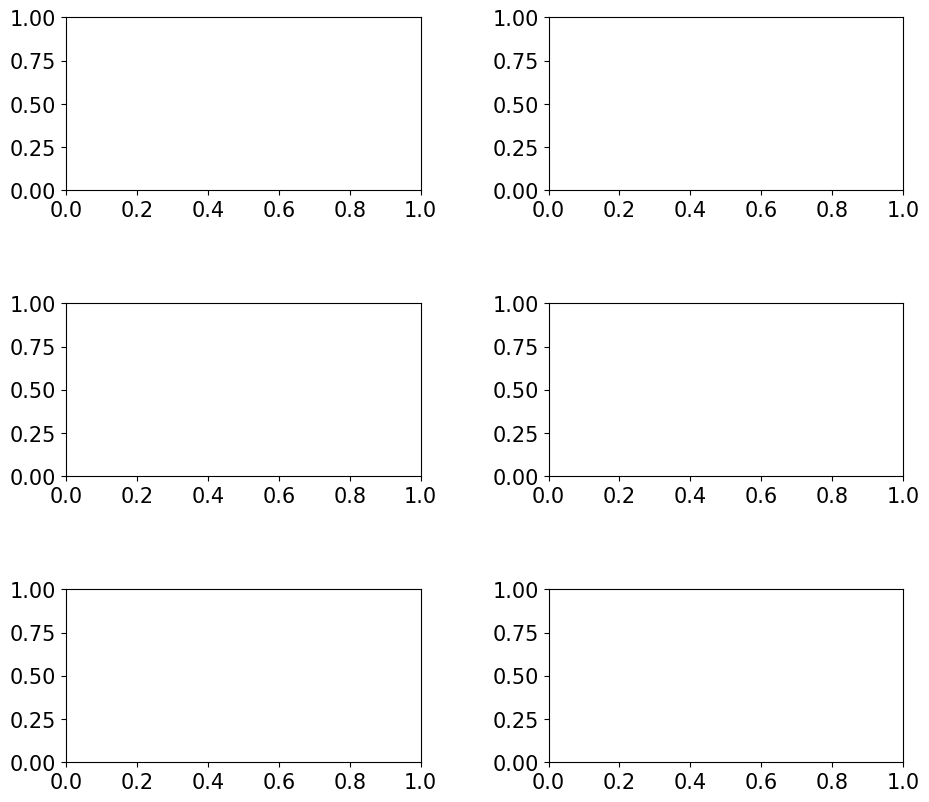

In [75]:
mpl.rc('font',size=15)
mpl.rc('axes',titlesize=15)
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,9)

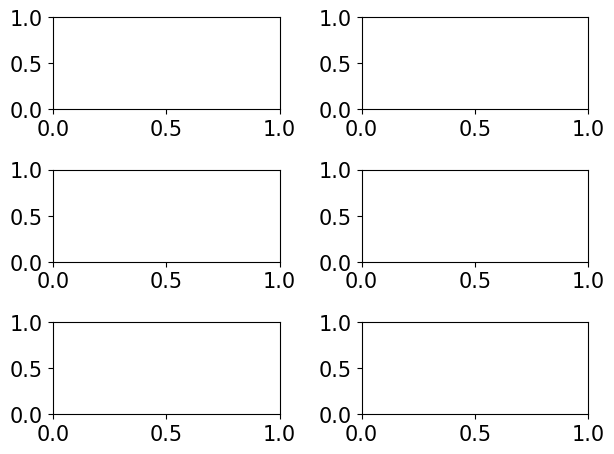

In [76]:
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()

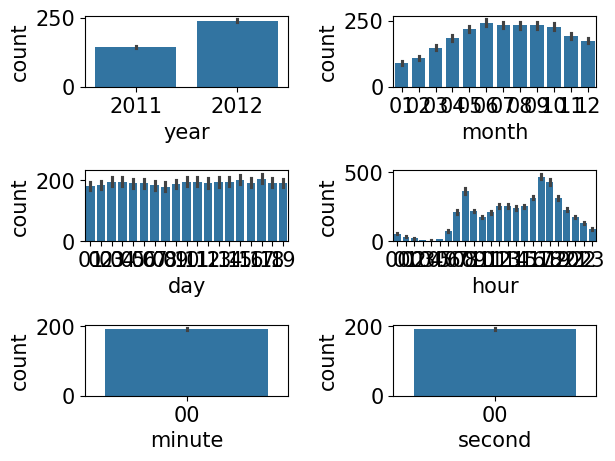

In [81]:
figure, axes = plt.subplots(nrows=3, ncols=2)
sns.barplot(x='year',y='count',data=train,ax=axes[0][0])
sns.barplot(x='month',y='count',data=train,ax=axes[0][1])
sns.barplot(x='day',y='count',data=train,ax=axes[1][0])
sns.barplot(x='hour',y='count',data=train,ax=axes[1][1])
sns.barplot(x='minute',y='count',data=train,ax=axes[2][0])
sns.barplot(x='second',y='count',data=train,ax=axes[2][1])
plt.tight_layout()
plt.show()

In [82]:
axes[0][0].set(ylabel='Count',title='연도별 대여량')
axes[0][1].set(xlabel='month',title='월별 대여량')
axes[1][0].set(xlabel='day',title='일별 대여량')
axes[1][1].set(xlabel='hour',title='시간별 대여량')
axes[2][0].set(xlabel='minute',title='분별 대여량')
axes[2][1].set(xlabel='second',title='초별 대여량')

[Text(0.5, 30.000000000000007, 'second'), Text(0.5, 1.0, '초별 대여량')]

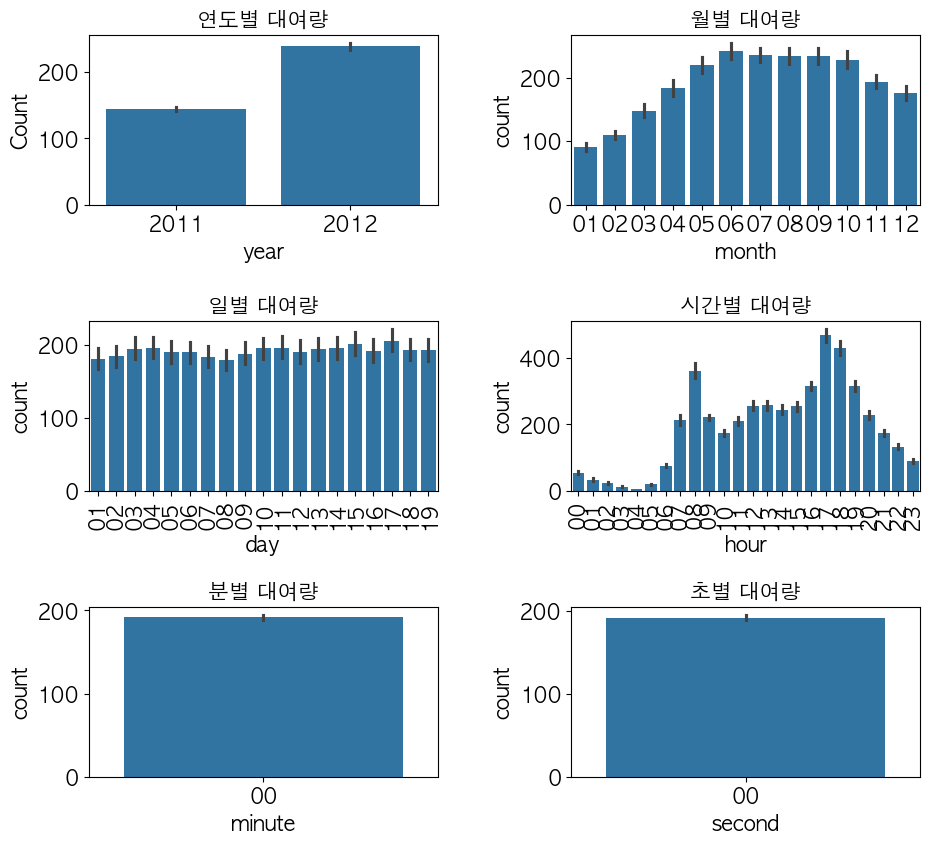

In [86]:
mpl.rc('font',size=15)
mpl.rc('axes',titlesize=15)

plt.rc('font', family='AppleGothic')  # Mac 기본 한글 폰트
plt.rc('axes', unicode_minus=False)  # 마이너스 기호 깨짐 방지
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,9)
sns.barplot(x='year',y='count',data=train,ax=axes[0][0])
sns.barplot(x='month',y='count',data=train,ax=axes[0][1])
sns.barplot(x='day',y='count',data=train,ax=axes[1][0])
sns.barplot(x='hour',y='count',data=train,ax=axes[1][1])
sns.barplot(x='minute',y='count',data=train,ax=axes[2][0])
sns.barplot(x='second',y='count',data=train,ax=axes[2][1])

axes[0][0].set(ylabel='Count',title='연도별 대여량')
axes[0][1].set(xlabel='month',title='월별 대여량')
axes[1][0].set(xlabel='day',title='일별 대여량')
axes[1][1].set(xlabel='hour',title='시간별 대여량')
axes[2][0].set(xlabel='minute',title='분별 대여량')
axes[2][1].set(xlabel='second',title='초별 대여량')

axes[1][0].tick_params(axis='x',labelrotation=90)
axes[1][1].tick_params(axis='x',labelrotation=90)


plt.show()